# Potpourri of graph stuffs

In this notebook you can find different stuffs related with graph theory and their methods based on the use of Networkx library but also includding other libraries.

## 1. Preparing the graph

### 1.1. Introduction

### 1.2. Libraries

In [1]:
# Libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import time

A simple graph is used in order to show this example. The data of the graph is imported from a csv file previously done. We use two attributes: name and weight. Therefore, with the same same nodes and edges, two graphs are used: one with name and the other with weight as edge attribute.  

In [2]:
dfNodes = pd.read_csv('files/airports_arg_nodes.csv',sep=';')
dfEdges = pd.read_csv('files/airports_arg_edges.csv',sep=';')
G1 = nx.Graph()
for i in range (len(dfNodes)):
    G1.add_node(dfNodes.iloc[i,0])
G1 = nx.from_pandas_edgelist(dfEdges, source='source', target='target', edge_attr='weight', create_using=nx.Graph())

### 1.3. Exporting graph edge_list as a pandas df 

In [3]:
df1=nx.to_pandas_edgelist(G1)
print(df1)

   source target  weight
0     ROS    MDQ     700
1     ROS    AEP     300
2     ROS    COR     400
3     ROS    TUC     800
4     ROS    CNQ     720
5     MDQ    AEP     400
6     MDQ    COR    1100
7     MDQ    MDZ    1350
8     MDQ    CNQ    1300
9     AEP    MDZ    1050
10    AEP    COR     700
11    AEP    TUC    1250
12    AEP    CNQ     920
13    MDZ    COR     450
14    MDZ    TUC     950
15    COR    TUC     570
16    COR    CNQ     850
17    TUC    CNQ     800


## 2. Drawing a Graph

### 2.1. Graph Distribution

#### 2.1.1. Presentation:

Given a graph with edges and nodes, in order to draw it, you can ask to Networkx to present a layout of it. It can be done by two approaches: <br>
<b>- Draw: </b> Giving the layout with the draw instruction. <br>
<b>- Layout: </b> Deterimining the layout with the pos method.<br>
possible_layouts=["bipartite_layout" , "circular_layout" , "kamada_kawai_layout" , "random_layout" , "rescale_layout" , "rescale_layout_dict" , "shell_layout" , "spring_layout" , "spectral_layout" , "planar_layout" , "fruchterman_reingold_layout" , "spiral_layout" , "multipartite_layout"]

The following image shows examples of layouts used in networkx.
<img src="files/layouts.png" alt="Networkx layouts">
The image was obtained from: https://stackoverflow.com/questions/11479624/is-there-a-way-to-guarantee-hierarchical-output-from-networkx

### 2.1.2. Layout in Draw

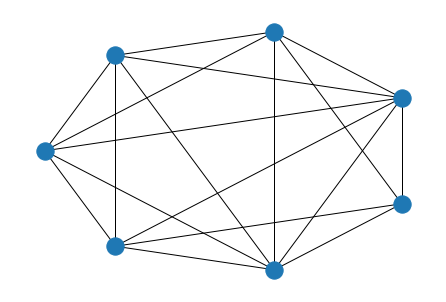

In [4]:
# Shell Layout:
nx.draw_shell(G1)

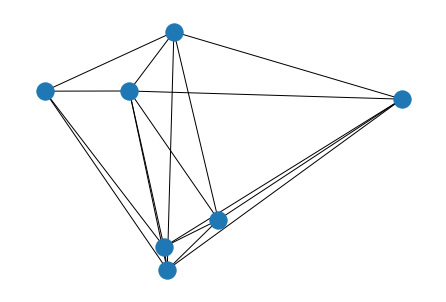

In [5]:
# Spectral Layout:
nx.draw_spectral(G1)

### 2.1.3. Layout in pos

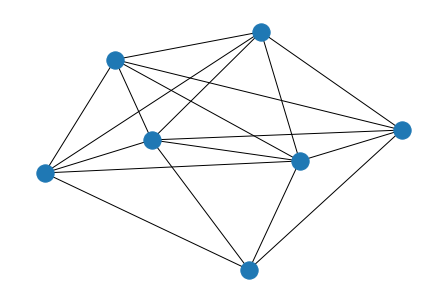

In [6]:
# Spring Layout:
pos = nx.spring_layout(G1)
nx.draw(G1,pos)

### 2.2. Showing labels

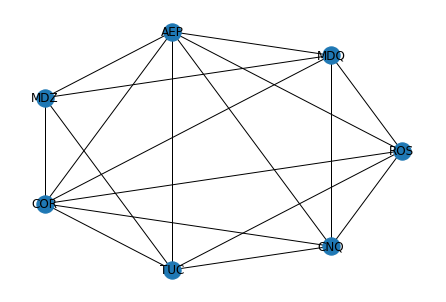

In [7]:
# Nodes labels
nx.draw_circular(G1,with_labels=True)

{('ROS', 'MDQ'): Text(0.8117449033666108, 0.3909157499862803, '700'),
 ('ROS', 'AEP'): Text(0.3887395418863754, 0.4874639471735968, '300'),
 ('ROS', 'COR'): Text(0.04951559945049633, -0.2169418641428812, '400'),
 ('ROS', 'TUC'): Text(0.3887395120840538, -0.48746393014369865, '800'),
 ('ROS', 'CNQ'): Text(0.8117448437619674, -0.39091579256102543, '720'),
 ('MDQ', 'AEP'): Text(0.20048444525298617, 0.878379688644928, '400'),
 ('MDQ', 'COR'): Text(-0.1387394971828929, 0.17397387732845007, '1100'),
 ('MDQ', 'MDZ'): Text(-0.1387394971828929, 0.6078576524464321, '1350'),
 ('MDQ', 'CNQ'): Text(0.6234897471285783, -5.108969419742593e-08, '1300'),
 ('AEP', 'MDZ'): Text(-0.5617448586631283, 0.7044058496337486, '1050'),
 ('AEP', 'COR'): Text(-0.5617448586631283, 0.2705220745157666, '700'),
 ('AEP', 'TUC'): Text(-0.2225209460295708, 8.514949079163614e-09, '1250'),
 ('AEP', 'CNQ'): Text(0.2004843856483429, 0.0965481460976223, '920'),
 ('MDZ', 'COR'): Text(-0.9009688010990073, 3.8317270661947234e-08,

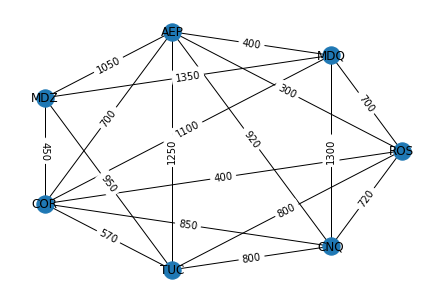

In [8]:
# Edge labels: Name
pos = nx.circular_layout(G1)
nx.draw(G1,pos,with_labels = True)
nx.draw_networkx_edge_labels(G1,pos,edge_labels=nx.get_edge_attributes(G1,'weight'))

### 2.3. Layout with Fixed possitions

#### Retrieving the position of nodes from a file

In [9]:
# Getting Pos from the Node's dataframe
pos=dfNodes.set_index('node').T.to_dict('list')
print(pos)

{'MDZ': [5, 13], 'TUC': [9, 29], 'COR': [11, 20], 'MDQ': [21, 3], 'ROS': [19, 18], 'AEP': [20, 13], 'CNQ': [21, 25]}


{('ROS', 'MDQ'): Text(20.0, 10.5, '700'),
 ('ROS', 'AEP'): Text(19.5, 15.5, '300'),
 ('ROS', 'COR'): Text(15.0, 19.0, '400'),
 ('ROS', 'TUC'): Text(14.0, 23.5, '800'),
 ('ROS', 'CNQ'): Text(20.0, 21.5, '720'),
 ('MDQ', 'AEP'): Text(20.5, 8.0, '400'),
 ('MDQ', 'COR'): Text(16.0, 11.5, '1100'),
 ('MDQ', 'MDZ'): Text(13.0, 8.0, '1350'),
 ('MDQ', 'CNQ'): Text(21.0, 14.0, '1300'),
 ('AEP', 'MDZ'): Text(12.5, 13.0, '1050'),
 ('AEP', 'COR'): Text(15.5, 16.5, '700'),
 ('AEP', 'TUC'): Text(14.5, 21.0, '1250'),
 ('AEP', 'CNQ'): Text(20.5, 19.0, '920'),
 ('MDZ', 'COR'): Text(8.0, 16.5, '450'),
 ('MDZ', 'TUC'): Text(7.0, 21.0, '950'),
 ('COR', 'TUC'): Text(10.0, 24.5, '570'),
 ('COR', 'CNQ'): Text(16.0, 22.5, '850'),
 ('TUC', 'CNQ'): Text(15.0, 27.0, '800')}

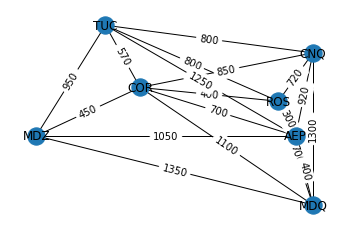

In [10]:
# Drawing the graph
fig = plt.figure() 
# "fig" is necessary if you want to save the figure. Also "ax" in next line.
nx.draw(G1,pos,with_labels = True,ax=fig.add_subplot(111))
nx.draw_networkx_edge_labels(G1,pos,edge_labels=nx.get_edge_attributes(G1,'weight'))

## 3. Saving graph

### 3.1. Saving the graph object as a binary file

In [11]:
fileName="files/G1.pkl" # path and pickle file name
nx.write_gpickle(G1, fileName)

### 3.2. Saving graph info as a text file

In [12]:
# Export to a pandas df
df2=nx.to_pandas_edgelist(G1)
# Export pandas df into a csv file
fileName="files/G1.csv" # path and csv file name
df2.to_csv(fileName,index=False,sep=';')

### 3.3. Saving the figure as an image file

In [13]:
fileName="results/G1.png" # path and file name
fig.savefig(fileName)